# Scipy - narzędzia obliczeń naukowych

Opracowano na podstawie następującej [dokumentacji](https://www.scipy-lectures.org/intro/scipy.html)

Scipy jest podstawowym i największym pakietem oprogramowania, który dostarcza wysublimowane algorytmy matematyczne dla potrzeb aplikacji języka Python. Do podstawowych składowych pakietu należą

* scipy.io - zarządzanie plikami
* scipy.special - definicje funkcji specjalnych
* scipy.linalg - oprogramowanie do operacji z zakresu algeby liniowej
* scipy.interpolation - algorytmy interpolacji
* scipy.optimize - algorytmy optymalizacyjne
* scipy.stats - elementy statystyki
* scipy.integrate - algorytmy całkowania numerycznego
* scipy.fftpack - szybka tranformata Fouriera
* scipy.signal - przetwarzanie sygnałów
* scipy.ndimage - przetwarzanie obrazów
* scipy.constant - stałe matematyczne
* scipy.cluster - algorytmy klasteryzacji
* scipy.sparse - biblioteka do pracy z macierzami rzadkimi
* scipy.misc - pakiet dodatków

Omówmy tylko kilka wybranych elementów z ogromnej oferty możliwości

# Optymalizacja scipy.optimize

## Aproksymacja funkcji 

Chcemy odszkać dopasowanie do następujących danych


[2.71431223 1.45959719]


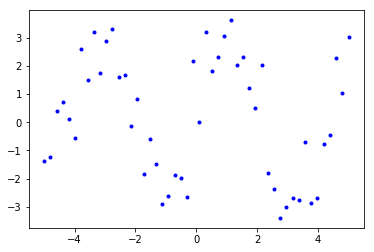

In [6]:
%matplotlib inline
import numpy as np
from scipy import optimize
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)


def test_func(x, a, b):
    return a * np.sin(b * x)
  
  
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)
import matplotlib.pyplot as plt
plt.plot(x_data,y_data,'.b')
plt.show()

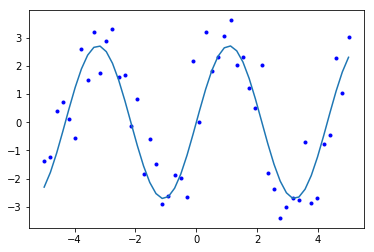

In [7]:
plt.plot(x_data,y_data,'.b')
plt.plot(x_data,test_func(x_data,params[0],params[1]))
plt.show()

## Minimalizacja funkcji jednowymiarowej

Często potrzebne jest wyszukanie punktu optimum dla pewnej funkcji. Tu również z pomocą przychodzi pakiet scipy.

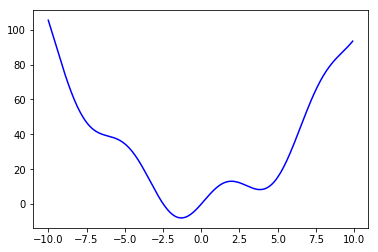

In [2]:
%matplotlib inline
import numpy as np
from scipy import optimize

def f(x):
  return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)

import matplotlib.pyplot as plt
plt.plot(x,f(x),'-b')
plt.show()

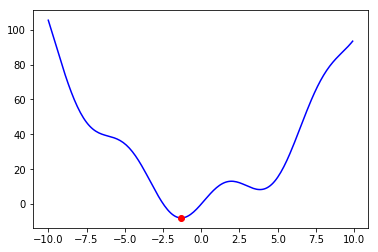

In [6]:
minimum = optimize.minimize(f,x0=-5.0)
minimum_x = minimum.x
plt.plot(x,f(x),'-b')
plt.plot(minimum_x,f(minimum_x),'or')
plt.show()

## Poszukiwanie miejsc zerowych

Oprócz ekstremów lokalnych ważnymi punktami wykresu są również miejsca zerowe. 


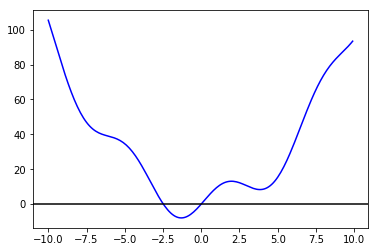

In [7]:
import numpy as np
from scipy import optimize

def f(x):
  return np.power(x,2) + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)

import matplotlib.pyplot as plt
plt.plot(x,f(x),'-b')
plt.axhline(0, color='black')
plt.show()

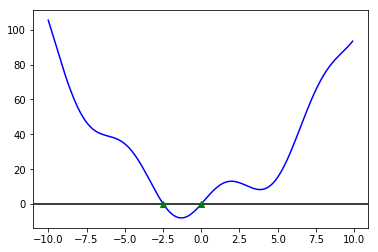

In [8]:
root1 = optimize.root(f,x0=1).x
root2 = optimize.root(f,x0=-2.5).x
plt.plot(x,f(x),'-b')
plt.axhline(0, color='black')
plt.plot([root1, root2],f([root1, root2]),'^g')
plt.show()

# Całkowanie

Pakiet Scipy wyposażony jest również w algorytmy całkowania numerycznego
Dokonajmy całkowania $$\int_0^\pi \sin(x) dx$$

In [17]:
import numpy as np
from scipy.integrate import quad

res, err = quad(np.sin, 0, np.pi)
print("Wynik=",res,"Błąd=",err)

Wynik= 2.0 Błąd= 2.220446049250313e-14


# Scipy.stats - statystyka dla analityka

Do najważniejszych pakietów ze scipy należy zaliczyć  scipy.stats. Pakiet ten grupuje całe moduły opisujące różne rozkłady prawdopodobieństwa. Lista wszystkich dostęp rozkładu [tu](https://docs.scipy.org/doc/scipy/reference/stats.html)

Do kluczowych funkcji tam zebranych należą np

* pdf - funkcja gęstości / rozkładu prawdopodobieństwa
* cdf - dystrybuanta
* ppf - kwantyle rozkładu
* rvs - generator prób z rozkładu

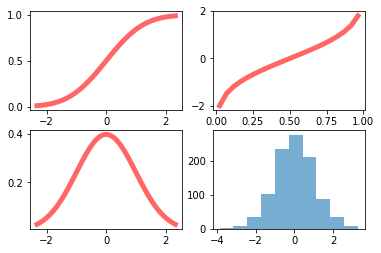

In [9]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2)

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
axes[0,0].plot(x, norm.cdf(x),'r-', lw=5, alpha=0.6, label='norm cdf')
axes[1,0].plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
axes[0,1].plot(x, norm.ppf(x),'r-', lw=5, alpha=0.6, label='norm ppf')
axes[1,1].hist(norm.rvs(size=1000), alpha=0.6, label='random ppf' )
plt.show()

## Zadanie

Wygenerować analogiczne wykresy dla 

* rozkładu normalnego z innymi parametrami
* wybranego innego rozkładu ciągłego
* wybranego rozkładu dyskretnego

In [20]:
pass

## Testowanie hipotez statystycznych

Oprócz zmiennych losowych różnych rozkładów pakiet stats udostępnia również wielu różnych prostych testów statystycznych.

### Test normalności Shapiro-Wilka

In [21]:
import scipy.stats as stats
x = stats.norm.rvs(size=100)
y = stats.uniform.rvs(size=100)
W, p_value=stats.shapiro(x)
print("W=",W,"p-value=",p_value)
W, p_value=stats.shapiro(y)
print("W=",W,"p-value=",p_value)

W= 0.9942392110824585 p-value= 0.9503734707832336
W= 0.9458286166191101 p-value= 0.00044517990318126976


### Test zgodności dwóch rozkładów Smirnova-Kołmogorova


In [22]:
import scipy.stats as stats
x = stats.norm.rvs(size=100)
y = stats.norm.rvs(size=100)
W, p_value = stats.ks_2samp(x,y)
print("W=", W, "p-value=", p_value)
z = stats.t.rvs(size=100, df=2)
W, p_value = stats.ks_2samp(x,z)
print("W=", W, "p-value=", p_value)

W= 0.08000000000000002 p-value= 0.8937515524105731
W= 0.12 p-value= 0.4431254026988257


### Test t dla średniej

In [23]:
import scipy.stats as stats
x = stats.norm.rvs(size=40, loc=32, scale=2)
W, p_value = stats.ttest_1samp(x, popmean=30)
print("W=", W, "p-value=", p_value)
W, p_value = stats.ttest_1samp(x, popmean=31)
print("W=", W, "p-value=", p_value)
W, p_value = stats.ttest_1samp(x, popmean=32)
print("W=", W, "p-value=", p_value)

W= 7.248460861241759 p-value= 9.79406834079911e-09
W= 3.8803914831921467 p-value= 0.0003909024592554774
W= 0.5123221051425342 p-value= 0.6113149740571592



lub w wersji o równości średnich

In [24]:
import scipy.stats as stats
x = stats.norm.rvs(size=40, loc=32, scale=2)
y = stats.norm.rvs(size=50, loc=32, scale=3)
z = stats.norm.rvs(size=40, loc=31, scale=1)
w = stats.norm.rvs(size=50, loc=32, scale=10)
W, p_value = stats.ttest_ind(x, y)
print("W=", W, "p-value=", p_value)
W, p_value = stats.ttest_ind(x, z)
print("W=", W, "p-value=", p_value)
W, p_value = stats.ttest_ind(x, w)
print("W=", W, "p-value=", p_value)

W= -0.2412933641218954 p-value= 0.8098890911480231
W= 2.644431780766878 p-value= 0.009889911538604865
W= 0.1559360902659535 p-value= 0.8764405561343699


### Test Levene o równości wariancji dla prób z rozkładu normalnego


In [25]:
import scipy.stats as stats
x = stats.norm.rvs(size=40, loc=32, scale=2)
y = stats.norm.rvs(size=40, loc=0, scale=2)
W, p_value = stats.levene(x,y)
print("W=", W, "p-value=", p_value)

W= 0.20893639406905087 p-value= 0.6488728615727084


### Test Bartlett


In [26]:
import scipy.stats as stats
x = stats.norm.rvs(size=40, loc=32, scale=2)
y = stats.norm.rvs(size=40, loc=0, scale=2)
W, p_value = stats.bartlett(x,y)
print("W=", W, "p-value=", p_value)

W= 0.4696785838560271 p-value= 0.4931350721602126
